#### Ozlem Akbas
SWE-582 HW3


## Find Degree Of Equation

There are N of $x_{i}$ and $y_{i}$ point, which fit a line, but we do not know the degree of the equation. We should find the degree, but for this method; higher degree always gives us the function which cause less error, 

From last lesson:

$x_{i}$ and $y_{i}$ are Gaussian Distribution.

\begin{align*}
y_{i} &=& a_{0} + a_{1}x^{1} + a_{2}x^{2} + ... + a_{n}x^{n} \\
w_{i}^{T} &=& [1, x_{i}^{1}, x_{i}^{2}, ... ,x_{i}^{n}] \\
y_{i} & \sim & {\cal N} (y, w_{i}^{T}a,s)
\\
\end{align*}

#### Gaussian Distribution

\begin{align*}
{\cal N}(x;\mu, v) =  \frac{1}{\sqrt{2\pi \sigma^{2}}} \exp\left(-\frac12 \frac{(x - \mu)^2}{\sigma^{2}}\right)
\end{align*}

Log of Gaussian Distribution is:

\begin{align*}
log ({\cal N}(x;\mu, v)) =  -\frac{1}{2}log(2\pi \sigma^{2}) - \frac{1}{2}{\left(\frac{x - \mu}{\sigma}\right)}^{2}
\\
\end{align*}
Our model:
\begin{align*}
p(y_{1:N}|a,x_{1:N}) &=& \prod_{i=1}^N p(y_{i}|x_{i},a)
\end{align*}

Likelyhood Function of a, if the data has the same variance 's' :
\begin{align*}
{\cal L} (a) &=& log(p(y_{1:N}|a,x_{1:N})) \\
log({\cal N} (y, w_{i}^{T}a,s)) &=& -\frac{1}{2}log(2\pi s) - \frac{1}{2}{\left(\frac{x - \mu}{s}\right)}^{2} \\
{\cal L} (a) &=& - \frac{N}{2}log(2\pi s) - \frac{1}{2s} \sum_{i=1}^N (y_{i}-w_{i}^{T}a)^2 \\
a &=& (W^TW)^{-1}W^{T}y
\end{align*}

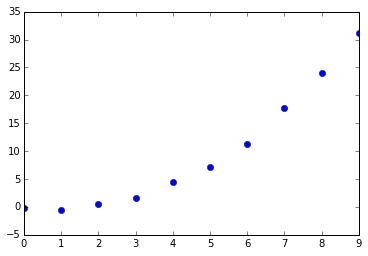

For 1 th degree -559.062405859
For 2 th degree -63.8981441895
For 3 th degree -0.579077175935
For 4 th degree -0.519386831536
For 5 th degree -0.467941674257
For 6 th degree -0.337212141624
For 7 th degree -0.334035076708
For 8 th degree -0.2890057236


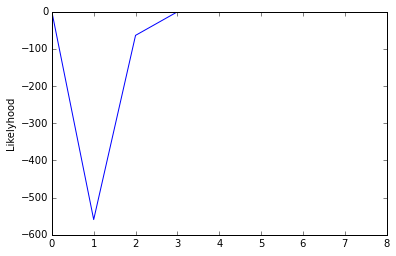

In [28]:
#Author Ozlem Akbas
#Python 2 was used

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import scipy.linalg as la

N = 10
K = 4
s = 0.1

x = np.arange(N)

e = np.sqrt(s) * np.random.randn(N)

# Data Generation which is taken from last lecture notes
W = x.reshape((N,1))**np.arange(K).reshape(1,K)
a = np.array([0,-1,0.5,0])
y = np.dot(W, a) + e

plt.plot(x, y, 'o')
#plt.plot(e)
plt.show()

# a vector is calculated, for different degree of polinomial
M = 9
LL = np.zeros(M)
for k in range(1,M):
    W_prime = x.reshape((N,1))**np.arange(k).reshape(1,k)
    a_prime,re,ra, cond = la.lstsq(W_prime, y)
    a_prime
    e = (y-np.dot(W_prime, a_prime))
    LL[k] = -0.5*np.dot(e.T, e)
    print 'For', k,'th degree',LL[k]

plt.plot(LL)
plt.ylabel('Likelyhood')
plt.show()

